In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression

Largely inspired by https://joellaity.com/2018/10/18/pca.html

In [74]:
n_observations = 100

sigma_1 = 1
sigma_2 = 0.3

mu_1 = 3
mu_2 = 1

x = np.random.normal(mu_1, sigma_1, n_observations)
y = np.random.normal(mu_2, sigma_2, n_observations)
data = np.array([x, y]).T

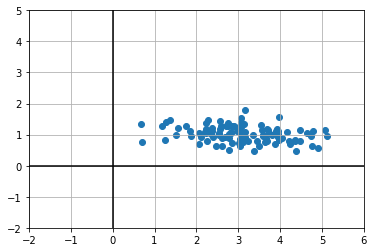

In [76]:
plt.scatter(data[:,0], data[:,1])
plt.xlim([-2, 6])
plt.ylim([-2, 5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

## Rotation

We now rotate the data using a rotation matrix as explained here https://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/:


$$R = \begin{pmatrix}
cos \theta & -sin \theta\\
sin \theta & cos \theta
\end{pmatrix}$$

In [4]:
angle = 45
theta = np.radians(angle)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s),(s,c)))

In [266]:
data_rotated = (R @ data.T).T

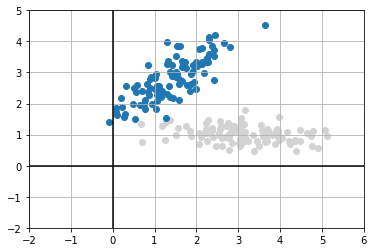

In [83]:
plt.scatter(data[:,0], data[:,1], c='lightgrey')
plt.scatter(data_rotated[:,0], data_rotated[:,1])
plt.xlim([-2, 6])
plt.ylim([-2, 5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

## Line

Since PCA gives a solution that is also optimal w.r.t MSE, we can use a linear regression to represent the target set in 1D.

In [7]:
X=data_rotated[:,0].reshape(-1, 1)
y=data_rotated[:,1]
reg = LinearRegression().fit(X,y)

In [84]:
x_points = np.linspace(-2,5,10)
line = reg.intercept_ + reg.coef_*x_points

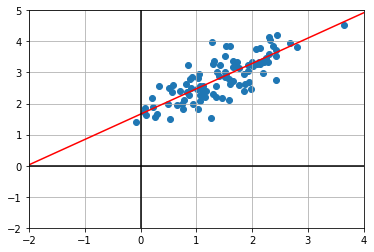

In [85]:
plt.scatter(data_rotated[:,0], data_rotated[:,1])
plt.plot(x_points, line, 'r')
plt.xlim([-2, 4])
plt.ylim([-2, 5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

## Center

In [10]:
x_centered = data_rotated[:,0]-np.mean(data_rotated[:,0])
y_centered = data_rotated[:,1]-np.mean(data_rotated[:,1])

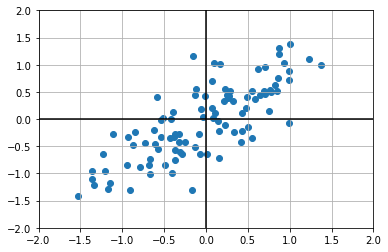

In [11]:
plt.scatter(x_centered, y_centered)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.grid()
plt.show()

In [12]:
X_c = np.array([x_centered, y_centered]).T

# Eigens

The PCA consists in finding the projection that least distort the data. It is equivalent of finding eigenvectors associated with the highest eigenvalues of the covariance matrix. Proof of the equivalence: https://savoga.github.io/stats/principal-component-analysis/.

Reminder: $X^T_CX_C = n*Cov_n(X)$

In [13]:
cov = (1/n_observations) * X_c.T @X_c
cov

array([[0.53326328, 0.43513504],
       [0.43513504, 0.53925187]])

In [35]:
e_vals, e_vecs = np.linalg.eig(cov)
e_vec1 = e_vecs[:,0]
e_vec2 = e_vecs[:,1]

In [36]:
e_vec1 @ e_vec2 # = 0 => confirms both vectors are orthogonal

0.0

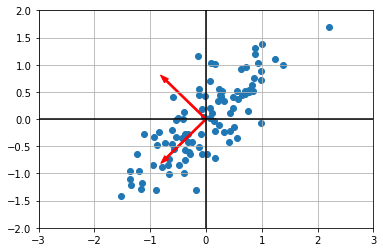

In [37]:
plt.scatter(x_centered, y_centered)
plt.arrow(0, 0, e_vec1[0], e_vec1[1], head_width=0.1, color='red', width=0.03)
plt.arrow(0, 0, e_vec2[0], e_vec2[1], head_width=0.1, color='red', width=0.03)
plt.xlim([-3, 3])
plt.ylim([-2, 2])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.grid()
plt.show()

Eigenvectors are the **perpendicular** directions that "drive" the data. The orthogonality allows to have very distinct directions.

In [101]:
# TODO: 3D example
fig = go.Figure(data=[go.Scatter3d(x=x_centered, y=y_centered, z=np.ones(100),
                                   mode='markers',
                                   marker=dict(
                                       size=12,
                                       opacity=0.8
                                       )
                                   )])
fig.add_trace(go.Scatter3d(x=[[0,5,0]], y=[[1,5,1]], z=[[5,1,1]], line=dict(
        color='red',
        width=2
    )))
fig.show()

In [134]:
e_val1 = e_vals[0] # small eigenvalue
e_val2 = e_vals[1] # large eigenvalue

In [140]:
e_vec1_scaled = 2*np.sqrt(e_val1)*e_vec1
e_vec2_scaled = 2*np.sqrt(e_val2)*e_vec2

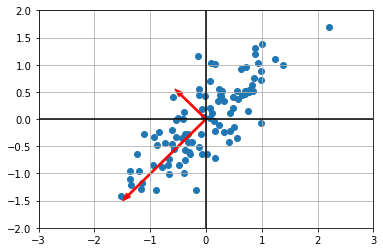

In [136]:
plt.scatter(x_centered, y_centered)
plt.arrow(0, 0, e_vec1_scaled[0], e_vec1_scaled[1], head_width=0.1, color='red', width=0.03)
plt.arrow(0, 0, e_vec2_scaled[0], e_vec2_scaled[1], head_width=0.1, color='red', width=0.03)
plt.xlim([-3, 3])
plt.ylim([-2, 2])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.grid()
plt.show()

## Projection

The projection that would least distort the data is the one represented by the smallest vector (associated with the smallest eigenvalue). We thus **keep** the largest eigenvalue, because it is the most important variability.

In [294]:
X_projected = X_c @ e_vec2 # e_vec2 = eigenvector associated with the largest eigenvalue

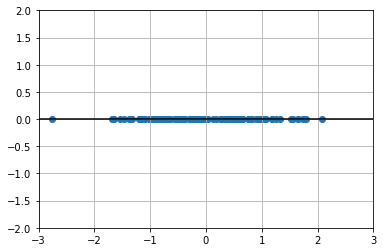

In [295]:
plt.scatter(X_projected, np.zeros(len(X_projected)))
plt.xlim([-3, 3])
plt.ylim([-2, 2])
plt.axhline(y=0, color='k')
plt.grid()
plt.show()

If we want to display the result (1D) on the initial graph (2D) we need to use the same *base* (to be verified?), thus rotate the results from 45 degrees.

Note: this is just for representation purposes, but rotating the vector doesn't change its 1d representation.

In [297]:
X_projected_2d = np.array([X_projected, np.zeros(len(X_projected))]).T
X_projected_rotated = (R @ X_projected_2d.T).T

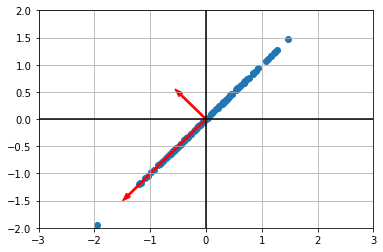

In [298]:
plt.scatter(X_projected_rotated[:,0], X_projected_rotated[:,1])
plt.arrow(0, 0, e_vec1_scaled[0], e_vec1_scaled[1], head_width=0.1, color='red', width=0.03)
plt.arrow(0, 0, e_vec2_scaled[0], e_vec2_scaled[1], head_width=0.1, color='red', width=0.03)
plt.xlim([-3, 3])
plt.ylim([-2, 2])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.grid()
plt.show()

TODO: understand the relationship original features VS final features

Can we translate the final features into original features? With a linear combination maybe?

Below is a starting experimentation with only 2 observations...

In [312]:
X_sample = X_c[:2]
X_sample_projected = X_c[:2] @ e_vec2
X_sample_projected_2d = np.array([X_sample_projected, np.zeros(len(X_sample_projected))]).T
X_sample_projected_rotated = (R @ X_sample_projected_2d.T).T

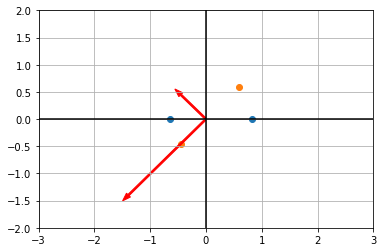

In [317]:
#plt.scatter(X_sample[:,0], X_sample[:,1])
plt.scatter(X_sample_projected_2d[:,0], X_sample_projected_2d[:,1])
plt.scatter(X_sample_projected_rotated[:,0], X_sample_projected_rotated[:,1])
plt.arrow(0, 0, e_vec1_scaled[0], e_vec1_scaled[1], head_width=0.1, color='red', width=0.03)
plt.arrow(0, 0, e_vec2_scaled[0], e_vec2_scaled[1], head_width=0.1, color='red', width=0.03)
plt.xlim([-3, 3])
plt.ylim([-2, 2])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.grid()
plt.show()